# Lecture 1

## Graphs

In [1]:
import numpy as np

##################################################
##### Matplotlib boilerplate for consistency #####
##################################################
from ipywidgets import interact
from ipywidgets import FloatSlider
from matplotlib import pyplot as plt

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

global_fig_width = 10
global_fig_height = global_fig_width / 1.61803399
font_size = 12

plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.edgecolor'] = '0.8'
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelpad'] = 8
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.titlepad'] = 16.0
plt.rcParams['axes.titlesize'] = font_size * 1.4
plt.rcParams['figure.figsize'] = (global_fig_width, global_fig_height)
plt.rcParams['font.sans-serif'] = ['Computer Modern Sans Serif', 'DejaVu Sans', 'sans-serif']
plt.rcParams['font.size'] = font_size
plt.rcParams['grid.color'] = '0.8'
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams['lines.dash_capstyle'] = 'round'
plt.rcParams['lines.dashed_pattern'] = [1, 4]
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['xtick.major.pad'] = 4
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['ytick.major.pad'] = 4
plt.rcParams['ytick.major.size'] = 0
##################################################

/tmp/ipykernel_6840/206549544.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


# Basics

Terminology:

- $Y$ or $y$ is the *dependent* variable, sometimes called the *ordinate*
  marked on the vertical axis
- $X$ or $x$ is the *independent* variable, sometimes called the *abscissa*
  marked on the horizontal axis
- The dependent variable is said to be graphed *against* the independent 
  variable

Essential Features:

- Title
- Axis labels (and units if appropriate)

In [2]:
# Fake data for example plot
x = np.linspace(0, 25, 100)
e = np.random.normal(0, 0.2, 100)
y = np.sin(x) + e

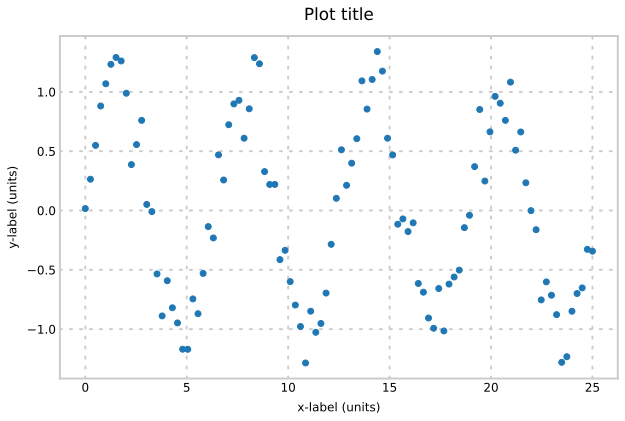

In [3]:
import matplotlib.pyplot as plt
plt.title('Plot title')   
plt.xlabel('x-label (units)')
plt.ylabel('y-label (units)')
plt.plot(x, y, 'o');


# Equation of a straight line

Defined by a gradient, $m$, and a $y$-axis intercept, $c$:

$$y = m x + c$$

Interpretation:

- The intercept of this line on the $y$ axis is given by $y=c$, since at $x=0$, 
  $y = c$


- The gradient of this line (also called its "slope") is given by 
  $$m = {y_2-y_1\over x_2 - x_1}$$
  ("change in $y$ divided by change in $x$")


- The intercept of this line on the $x$ axis is given by $x = -{c \over m}$, 
  since at $y=0$ we must have $mx=-c$

# Graphs of Polynomials

An expression involving higher powers of $x$ is called a *polynomial* in $x$.



## Example

$y=x^5-5x^3+4x$



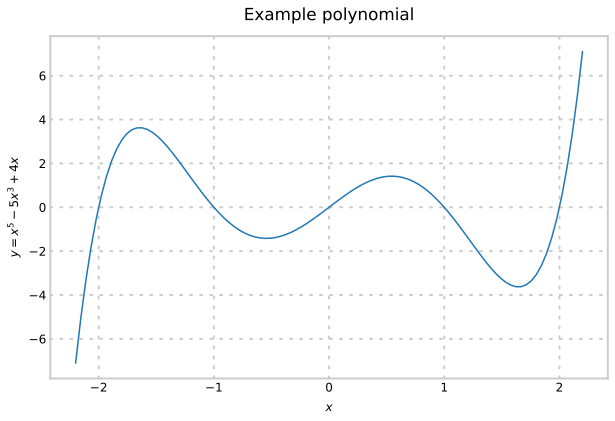

In [4]:
import numpy as np
x = np.linspace(-2.2, 2.2, 100) # use 100 regularly spaced x-points from -2.2 to 2.2
y = x**5 - 5.0*x**3 + 4*x       # generate y values of polynomial from x
plt.title('Example polynomial')
plt.xlabel('$x$')
plt.ylabel('$y=x^5-5x^3+4x$')
plt.plot(x, y);

## In general

$$y = a_n x^n + a_{n-1} x^{n-1} + a_{n-2} x^{n-2}+\ldots+a_1 x^1 + a_0x^0$$

The graph of a polynomial of degree $n$ has at most $n-1$ bends in it.

# Transforming from non-linear to linear

If we wish to test visually whether some data fit a particular relationship, we can transform the data to plot something which should be linear if the relationship holds.

## e.g. Test for *parabolic* shape for data in $(x,y)$: i.e. $y = x^2$

- We can plot $Y$ against $X$ where we let $Y=y$ and $X=x^2$.

In [5]:
# Generate figs for "transforming from non-linear to linear"

x = np.random.uniform(0, 8, 100)
e = np.random.normal(0, 8.0, 100)
y = 5. * x * x + 87. + e



### First plot the original data
There's a definite curve, and we may suspect the trend is quadratic

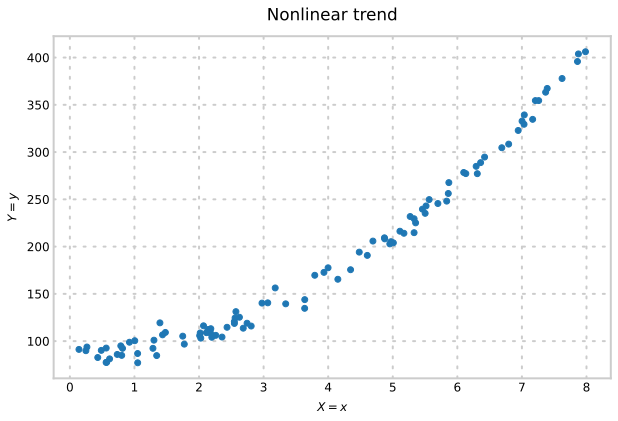

In [6]:
plt.title('Nonlinear trend')
plt.xlabel('$X=x$')
plt.ylabel('$Y=y$')
plt.plot(x, y, 'o');

### Now plot the data nonlinearly

If the parabolic relationship holds, plotting $Y=y$ against $X=x^2$ should result in a straight line.

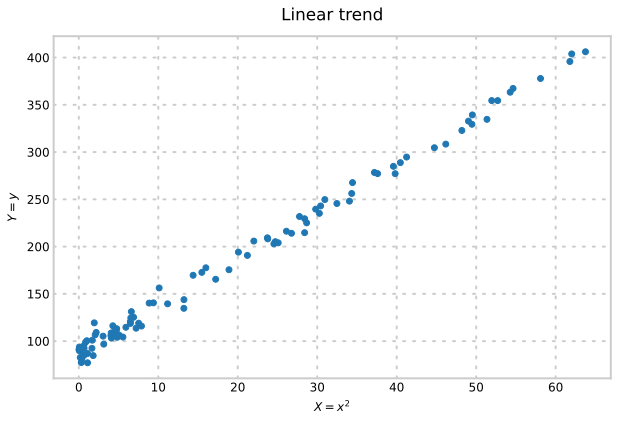

In [7]:
xx = x * x
plt.title('Linear trend')
plt.xlabel('$X=x^2$')
plt.ylabel('$Y=y$')
plt.plot(xx, y, 'o');

### Calculate the gradient and the intercept

We next add a trendline through these points which we can use to determine the gradient and intercept.

In [8]:
m_widget = FloatSlider(value=5.0, min=4.0, max=6.0, step=0.1, continuous_update=False)
c_widget = FloatSlider(value=87.0, min=2.0, max=172.0, step=5.0, continuous_update=False)

def add_line(m, c):
    plt.title('Linear trend with trendline')
    plt.xlabel('$X=x^2$')
    plt.ylabel('$Y=y$')
    plt.plot(xx, y, 'o');
    plt.plot([0., 64.], [c, 64. * m + c]);

In [9]:
interact(add_line, m=m_widget, c=c_widget, continuous_update=False);

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='m', max=6.0, min=4.0), Floa…

- We find $(X,Y)$ lie along a straight line with slope 5 and Y-intercept 87.


- This means that $Y=5X+87$ 


- So, $y$ and $x$ can be modelled by the polynomial equation $y=5x^2+87$.

# Example from biosciences

The rate at which a given enzyme can catalyse a reaction can be dependent upon the substrate concentration:
$${1\over V} = {m\over S} + c$$


where $V$ is the rate of the reaction, $S$ is the substrate concentration and 
$m$ and $c$ are constants.


- We can derive a straight line graph from the above formula by plotting 
   $Y=1/V$ against $X=1/S$


- It will have gradient $m$ and ordinate intercept $c$


First, plot the original data which is observations of $V$ given varying $S$:

In [10]:
# Generate figs for "transforming from non-linear to linear"

m = 3
c = 5
e = np.random.normal(0, 0.001, 100)
S = np.random.uniform(0.2,0.8,100)
V = e + S/(m+c*S)

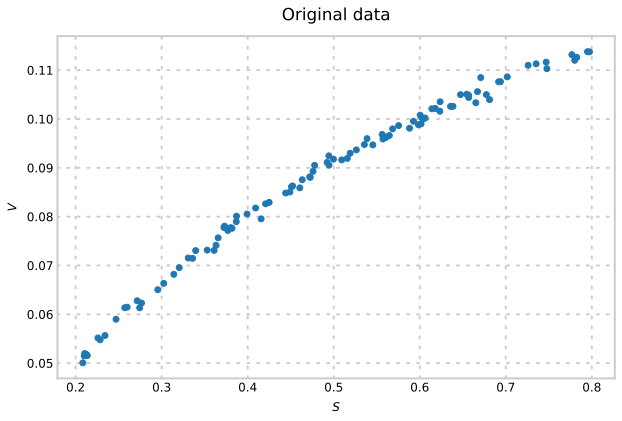

In [11]:
plt.title('Original data')
plt.xlabel('$S$')
plt.ylabel('$V$')
plt.plot(S, V, 'o');

### Now plot the data nonlinearly

If the hypothesised relationship holds, plotting $Y=1/V$ against $X=1/S$ should result in a straight line.

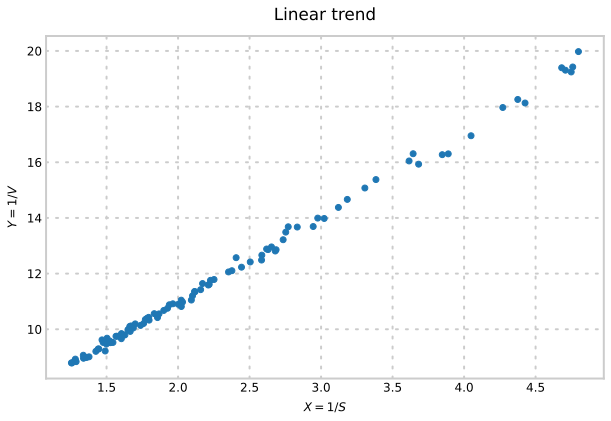

In [12]:
plt.title('Linear trend')
plt.xlabel('$X=1/S$')
plt.ylabel('$Y=1/V$')
plt.plot(1/S, 1/V, 'o');

### Calculate the gradient and the intercept

We next add a trendline through these points which we can use to determine the gradient and intercept.

In [13]:
m_widget = FloatSlider(value=3.0, min=2.0, max=4.0, step=0.1, continuous_update=False)
c_widget = FloatSlider(value=5.0, min=0.0, max=10.0, step=0.5, continuous_update=False)

def add_line(m, c):
    plt.title('Linear trend with trendline')
    plt.xlabel('$X=1/S$')
    plt.ylabel('$Y=1/V$')
    plt.plot(1/S, 1/V, 'o');
    plt.plot([1.25, 5.0], [1.25*m+c, 5.0*m+c]);

In [14]:
interact(add_line, m=m_widget, c=c_widget, continuous_update=False);

interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='m', max=4.0, min=2.0), Floa…

- We find $(X,Y)$ lie along a straight line with slope 3 and Y-intercept 5.

- This means that $Y=3X+5$ 

- So, $V$ and $S$ can be modelled by the equation $1/V=3/S+5$.